# Goals of CP Autoencoder

Purpose: 
- Build torch tensors required for the CP autoencoders. 
- Train the autoencoder
- Accepts tensor of shape (x,y) with full fata frame, and the subset of continuous v categorical variables
- saves autoencoded vector to authoencoder.pt using torch.save
- we want channell weights? What are these?
- 


Things to measure for the autoencoder
- time to train
- time spent per epoch
- save model checkpoint file with model definition

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import pylab
from torch import nn
from torch import optim
import torchvision
from sklearn import preprocessing

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
bank_df = pd.read_csv("bank/bank-full.csv", delimiter=';')

In [4]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_df.job.unique() ## hot encode this
dummies = pd.get_dummies(bank_df.job, prefix='job')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [6]:
bank_df.marital.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.marital, prefix='marital')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


In [7]:
bank_df.education.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.education, prefix='education')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,0,1,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,1,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1


In [8]:
bank_df.default.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.default, prefix='default')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,1,0,1,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,1,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,1,0,0,0,1,1,0


In [9]:
bank_df.housing.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.housing, prefix='housing')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,1,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,1,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,0,1,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,0,1,1,0,1,0


In [10]:
bank_df.loan.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.loan, prefix='loan')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,1,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,1,1,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,1,1,0,1,0,1,0


In [11]:
bank_df.contact.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.contact, prefix='contact')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,1,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,1,0,0,1,1,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,1,0,1,0,1,0,0,0,1


In [12]:
months = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

bank_df.month.unique() ##hot encode this
bank_df.month = bank_df.month.apply(lambda x: months[x])
bank_df.month.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [13]:
bank_df.pdays.unique() ##hot encode this
##-1 == not contacted

bank_df['prev_contacted'] = 0
# bank_df.loc[bank_df.pdays > 0].prev_contacted = 1
bank_df.prev_contacted.loc[bank_df.pdays > 0] = 1 

bank_df.prev_contacted.sample(20)

/home/jordan/repos/Autoencoder/venv/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


41419    0
26462    0
12925    0
4523     0
44327    0
29014    0
30399    0
39002    0
25322    0
44561    1
18602    0
14006    0
22709    0
2751     0
9022     0
41979    1
41187    0
272      0
13517    0
35991    0
Name: prev_contacted, dtype: int64

In [14]:
bank_df.previous.unique() ##hot encode this

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [15]:
bank_df.poutcome.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.poutcome, prefix='poutcome')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,prev_contacted,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1


In [16]:
bank_df.y.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.y, prefix='y')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_cellular,contact_telephone,contact_unknown,prev_contacted,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0


In [17]:
bank_df = bank_df.drop(['job','marital','education','default','housing','loan','contact','poutcome', 'y'], axis=1)

In [18]:
bank_df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,contact_cellular,contact_telephone,contact_unknown,prev_contacted,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,44,29,5,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,33,2,5,5,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,47,1506,5,5,92,1,-1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,33,1,5,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


# Normalizations

In [20]:
x = bank_df[['age','balance','day','month','campaign','pdays','previous','duration']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=['age','balance','day','month','campaign','pdays','previous','duration'])

In [21]:
df

,age,balance,day,month,campaign,pdays,previous,duration
0,0.519481,0.092259,0.133333,0.363636,0.000000,0.000000,0.000000,0.053070
1,0.337662,0.073067,0.133333,0.363636,0.000000,0.000000,0.000000,0.030704
2,0.194805,0.072822,0.133333,0.363636,0.000000,0.000000,0.000000,0.015453
3,0.376623,0.086476,0.133333,0.363636,0.000000,0.000000,0.000000,0.018707
4,0.194805,0.072812,0.133333,0.363636,0.000000,0.000000,0.000000,0.040260
...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.909091,0.032258,0.000000,0.000000,0.198658
45207,0.688312,0.088501,0.533333,0.909091,0.016129,0.000000,0.000000,0.092721
45208,0.701299,0.124689,0.533333,0.909091,0.064516,0.212156,0.010909,0.229158
45209,0.506494,0.078868,0.533333,0.909091,0.048387,0.000000,0.000000,0.103294


In [22]:
catdf = bank_df[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'prev_contacted',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes']]

In [23]:
df = pd.concat([df, catdf], axis=1)

In [24]:
df.dtypes

age                    float64
balance                float64
day                    float64
month                  float64
campaign               float64
pdays                  float64
previous               float64
duration               float64
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_no               uint8
default_yes              uint8
housing_no               uint8
housing_yes              uint8
loan_no                  uint8
loan_yes

In [25]:
df.to_csv('postNormalizedf2.csv')


In [5]:
df = pd.read_csv('postNormalizedf2.csv', index_col=0)
df.head()

,age,balance,day,month,campaign,pdays,previous,duration,job_admin.,job_blue-collar,...,contact_cellular,contact_telephone,contact_unknown,prev_contacted,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0.519481,0.092259,0.133333,0.363636,0.0,0.0,0.0,0.053070,0,0,...,0,0,1,0,0,0,0,1,1,0
1,0.337662,0.073067,0.133333,0.363636,0.0,0.0,0.0,0.030704,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0.194805,0.072822,0.133333,0.363636,0.0,0.0,0.0,0.015453,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0.376623,0.086476,0.133333,0.363636,0.0,0.0,0.0,0.018707,0,1,...,0,0,1,0,0,0,0,1,1,0
4,0.194805,0.072812,0.133333,0.363636,0.0,0.0,0.0,0.040260,0,0,...,0,0,1,0,0,0,0,1,1,0


In [6]:
## indices for MSE error
# indices_for_MSE = []
indices_for_MSE = [i for i in range(0,8)]
##indices for CE error
indices_for_CE = [i for i in range(8,43)]


# Train / Test Split

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [8]:
print(train.shape)
print(test.shape)

(36195, 43)
(9016, 43)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36195 entries, 1 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36195 non-null  float64
 1   balance              36195 non-null  float64
 2   day                  36195 non-null  float64
 3   month                36195 non-null  float64
 4   campaign             36195 non-null  float64
 5   pdays                36195 non-null  float64
 6   previous             36195 non-null  float64
 7   duration             36195 non-null  float64
 8   job_admin.           36195 non-null  int64  
 9   job_blue-collar      36195 non-null  int64  
 10  job_entrepreneur     36195 non-null  int64  
 11  job_housemaid        36195 non-null  int64  
 12  job_management       36195 non-null  int64  
 13  job_retired          36195 non-null  int64  
 14  job_self-employed    36195 non-null  int64  
 15  job_services         36195 non-null 

In [10]:

class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=20
        )
        self.encoder_output_layer = nn.Linear(
            in_features=20, out_features=10
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=10, out_features=20
        )
        self.decoder_output_layer = nn.Linear(
            in_features=20, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
#         print(code.shape)ro
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [13]:
## did some testing wiht dropout. Testing and training errors were higher for similiar epochs. This might be explained by the fact that the customer profile encoder is much smaller than transaction data

##also tested more layers and diff node configurations. Convergence was slower than model below. 

class autoencoder(nn.Module):
    def __init__(self, input_features,encoded_vector_length):
        super(autoencoder, self).__init__()
        self.input_features = input_features
        self.encoded_vector_length = encoded_vector_length
        self.encoder = nn.Sequential(
            nn.Linear(input_features,20),
            nn.ReLU(True),
            nn.Linear(20,encoded_vector_length),
            nn.ReLU(True))
#             nn.Linear(26,18),
#             nn.ReLU(True),
#             nn.Linear(18,10),
#             nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(encoded_vector_length,20),
            nn.ReLU(True),
            nn.Linear(20,input_features),
#             nn.ReLU(True),
#             nn.Linear(26,32),
#             nn.ReLU(True),
#             nn.Linear(32,43),
            nn.Sigmoid())
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [14]:
ae_test = autoencoder(43,10)
print(ae_test)
del ae_test

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=43, out_features=20, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=20, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=20, out_features=43, bias=True)
    (3): Sigmoid()
  )
)


In [15]:
# class autoencoder_with_dropout(nn.Module):
#     def __init__(self):
#         super(autoencoder_with_dropout, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(43,20),
#             nn.ReLU(True),
#             nn.Dropout(0.1),
#             nn.Linear(20,10),
#             nn.ReLU(True))
# #             nn.Linear(26,18),
# #             nn.ReLU(True),
# #             nn.Linear(18,10),
# #             nn.ReLU(True))
#         self.decoder = nn.Sequential(
#             nn.Linear(10,20),
#             nn.ReLU(True),
#             nn.Dropout(0.2),
#             nn.Linear(20,43),
# #             nn.ReLU(True),
# #             nn.Linear(26,32),
# #             nn.ReLU(True),
# #             nn.Linear(32,43),
#             nn.Sigmoid())
#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

In [16]:
a = [1]
a = torch.LongTensor(a)
b = [1,0,0.4]
b = torch.FloatTensor(b)
b = b.view(3,1)
c = [1,0,0.7]
c = torch.FloatTensor(c)

batch1 = [[0.5,0.1,0.4],[0.5,0.1,0.4],[0.5,0.1,.4]]
# batch1 = np.log(batch1)
batch1 = torch.FloatTensor(batch1)
batch2 = [[0.5,0.1,0.4],[0.5,0.1,0.4],[0.5,0.1,.4]]
# batch2 = np.log(batch2)
batch2 = torch.FloatTensor(batch2)

print(batch1)
print(batch2)

print(b.shape)
print(a.shape)


tensor([[0.5000, 0.1000, 0.4000],
        [0.5000, 0.1000, 0.4000],
        [0.5000, 0.1000, 0.4000]])
tensor([[0.5000, 0.1000, 0.4000],
        [0.5000, 0.1000, 0.4000],
        [0.5000, 0.1000, 0.4000]])
torch.Size([3, 1])
torch.Size([1])


In [55]:
# testing_CE_loss =nn.BC()
print(testing_CE_loss(a,b))
print(testing_CE_loss(a,c))

tensor(20.0000)
tensor(10.0000)


In [18]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=43).to(device)
model2= autoencoder(43,10).to(device)

# model3=autoencoder_with_dropout().to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)
optimizer2 = optim.Adam(model2.parameters(), lr=1e-3)
# optimizer3 = optim.Adam(model3.parameters(),lr=1e-3)

# mean-squared error loss for float entries
mse_crit = nn.MSELoss()

# need to compute Cross Entropy for categoric entries
cross_entropy_loss = nn.CrossEntropyLoss()

##combine criterion
criterion = nn.MSELoss()

def combined_criterion(output_tensor,input_tensor, indices_for_MSE, indices_for_CE):
    mse_loss = nn.MSELoss()(output_tensor[:,indices_for_MSE], input_tensor[:,indices_for_MSE]) ##need to identify the features that are to be fit to MSE Loss
#     print(f'the mse loss is {mse_loss}')
    bce_loss = nn.BCELoss()(output_tensor[:,indices_for_CE], input_tensor[:,indices_for_CE]) ##need to identify the features that are to be fit to CE Loss
#     print(f'the bce loss is {bce_loss}')
    loss = mse_loss + bce_loss
    return loss

In [21]:
batch1 = [[0.5,0.2,1],[0.1,0.2,0],[0,1,1]]
# batch1 = np.log(batch1)
batch1 = torch.FloatTensor(batch1)
batch2 = [[0.5,0.2,1],[0.1,0.2,0],[0,1,1]]
# batch2 = np.log(batch2)
batch2 = torch.FloatTensor(batch2)

assert combined_criterion(batch2,batch1,[0,1],[2]) == 0

In [22]:
train_tensor = torch.tensor(train.values, dtype=torch.float32)
test_tensor = torch.tensor(test.values)

assert train_tensor.shape[1] == test_tensor.shape[1]
assert train_tensor.shape[1] == model2.input_features

In [23]:
train_loader = torch.utils.data.DataLoader(train_tensor,batch_size=128,shuffle=True,num_workers=4,pin_memory=False)

In [24]:
test_loader = torch.utils.data.DataLoader(
    test_tensor, batch_size=128, shuffle=True, num_workers=4
)

In [292]:
# epochs = 100
# train_loss_tracker=[]
# test_loss_tracker=[]
# for epoch in range(epochs):
#     loss = 0
#     for batch_features in train_loader:
#         model.train(True)
        
#         # reshape mini-batch data to [N, 784] matrix
#         # load it to the active device
#         batch_features = batch_features.view(-1, 43).to(device)
        
#         # reset the gradients back to zero
#         # PyTorch accumulates gradients on subsequent backward passes
#         optimizer.zero_grad()
        
#         # compute reconstructions
#         outputs = model(batch_features.float())
        
#         # compute training reconstruction loss
#         train_loss = criterion(outputs, batch_features)
        
#         # compute accumulated gradients
#         train_loss.backward()
        
#         # perform parameter update based on current gradients
#         optimizer.step()
        
#         # add the mini-batch training loss to epoch loss
#         loss += train_loss.item()
    
#     # compute the epoch training loss
#     loss = loss / len(train_loader)
#     train_loss_tracker.append(loss)
    
#     # display the epoch training loss
#     print("epoch : {}/{}, training loss = {:.6f}".format(epoch + 1, epochs, loss))
    
#     test_loss =0
#     # what is test loss?
#     with torch.no_grad():
#         model.train(False)
#         #valid operations 
#         for test_batch in test_loader:
#             batch_features = test_batch.view(-1, 43).to(device)
#             model.eval()
#             outputs = model(batch_features.float())
#             batch_test_loss = criterion(outputs, batch_features)
#             optimizer.zero_grad()
#             test_loss += batch_test_loss.item()
# #         model.eval()
# #         preds = model(
#         test_loss = test_loss / len(test_loader)
#         test_loss_tracker.append(test_loss)

epoch : 1/100, training loss = 0.193676
epoch : 2/100, training loss = 0.157917
epoch : 3/100, training loss = 0.139718
epoch : 4/100, training loss = 0.125800
epoch : 5/100, training loss = 0.115783
epoch : 6/100, training loss = 0.111160
epoch : 7/100, training loss = 0.109037
epoch : 8/100, training loss = 0.107649
epoch : 9/100, training loss = 0.106874
epoch : 10/100, training loss = 0.106329
epoch : 11/100, training loss = 0.105863


KeyboardInterrupt: 

In [110]:
epochs = 4
train_loss_tracker=[]
test_loss_tracker=[]
for epoch in range(epochs):
    loss = 0
    test_loss =0
    # what is test loss?
#     with torch.no_grad():
#         model.train(False)
#         #valid operations 
#         for test_batch in test_loader:
#             batch_features = test_batch.view(-1, 43).to(device)
#             model.eval()
#             outputs = model(batch_features.float())
# #             batch_test_loss = criterion(outputs, batch_features)
#             batch_test_loss = combined_criterion(outputs.float(), batch_features.float(), indices_for_MSE, indices_for_CE)
#             optimizer.zero_grad()
#             test_loss += batch_test_loss.item()
# #         model.eval()
# #         preds = model(
#         test_loss = test_loss / len(test_loader)
#         test_loss_tracker.append(test_loss)
        
    for batch_features in train_loader:
        model.train(True)
        
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 43).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features.float())
        
        # compute training reconstruction loss
#         train_loss = criterion(outputs, batch_features)
        train_loss = combined_criterion(outputs, batch_features, indices_for_MSE, indices_for_CE)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    train_loss_tracker.append(loss)
    
    # display the epoch training loss
    print("epoch : {}/{}, training loss = {:.6f}".format(epoch + 1, epochs, loss))
    


RuntimeError: CUDA error: device-side assert triggered

In [112]:
i= 0
while i <3:
    for batch_features in train_loader:
        batch_features = batch_features.view(-1, 43).to(device)
        outputs = model(batch_features.float())
        train_loss = combined_criterion(outputs, batch_features, indices_for_MSE, indices_for_CE)
        i += 1
    

    

RuntimeError: CUDA error: device-side assert triggered

In [41]:
def autoencoder_training(epochs, model, train_loader, test_loader, optimizer, combined_criterion,indices_for_MSE, indices_for_CE):
    train_loss_tracker=[]
    test_loss_tracker=[]
    for epoch in range(epochs):
        loss = 0
        test_loss =0
        # what is test loss?
        with torch.no_grad():
            model.train(False)
            #valid operations 
            for test_batch in test_loader:
                batch_features = test_batch.view(-1, 43).to(device)
                model.eval()
                outputs = model(batch_features.float())
                batch_test_loss = combined_criterion(outputs.float(), batch_features.float(), indices_for_MSE, indices_for_CE)
                optimizer.zero_grad()
                test_loss += batch_test_loss.item()

            test_loss = test_loss / len(test_loader)
            test_loss_tracker.append(test_loss)

        for batch_features in train_loader:
            model.train(True)

            # reshape mini-batch data to [N, 784] matrix
            # load it to the active device
            batch_features = batch_features.view(-1, 43).to(device)

            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()

            # compute reconstructions
            outputs = model(batch_features.float())

            # compute training reconstruction loss
    #         train_loss = criterion(outputs, batch_features)
            train_loss = combined_criterion(outputs, batch_features, indices_for_MSE, indices_for_CE)

            # compute accumulated gradients
            train_loss.backward()

            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()

        # compute the epoch training loss
        loss = loss / len(train_loader)
        train_loss_tracker.append(loss)

        # display the epoch training loss
        print("epoch : {}/{}, training loss = {:.6f}".format(epoch + 1, epochs, loss))
    return model

In [39]:
autoencoder_training?

In [43]:
model = autoencoder_training(4, model2, train_loader, test_loader, optimizer2, combined_criterion, indices_for_MSE, indices_for_CE)

epoch : 1/4, training loss = 0.061100
epoch : 2/4, training loss = 0.058944
epoch : 3/4, training loss = 0.057114
epoch : 4/4, training loss = 0.055677


In [48]:
model.encoder(train_tensor[0].to(device))

tensor([ 5.4151,  5.5072, 19.3079, 16.1708, 12.9223,  4.3982,  0.0000, 10.7348,
        11.5687, 10.6587], device='cuda:0', grad_fn=<ReluBackward1>)

Text(0, 0.5, 'Error')

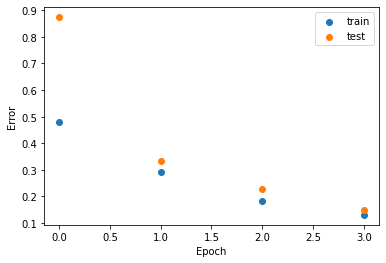

In [33]:
plt.scatter(range(epochs),train_loss_tracker, label='train')
plt.scatter(range(epochs),test_loss_tracker, label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Error')
# plt.ylim(0.04,0.0450)

In [36]:
## Total error by each feature
# error_by_feature =[]
# scra1 = model2(train_tensor)
# for feature in range(44):
#     loss = criterion(scra1[feature],train_tensor[feature])
#     error_by_feature.append(loss)



In [ ]:
# Add denoiseing function to the autoencoder
## pass the SAR / case count through to the latent vector
## Autograb the coded vector
## package a train function for the ae
## package an inference function for the ae -> grab the encoded vector

In [71]:
0.05*(np.random.normal(0,1,4))

array([-0.03852981,  0.02594552,  0.01204163,  0.00622267])

In [89]:
input_sample = train_tensor[41].clone()

In [97]:
input_sample

tensor([0.3636, 0.0744, 0.1333, 0.3636, 0.0000, 0.0000, 0.0000, 0.3615, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000])